<a href="https://colab.research.google.com/github/CuadraAlconero/IDAL_IA3_CuadraAlconero/blob/main/Atenttion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

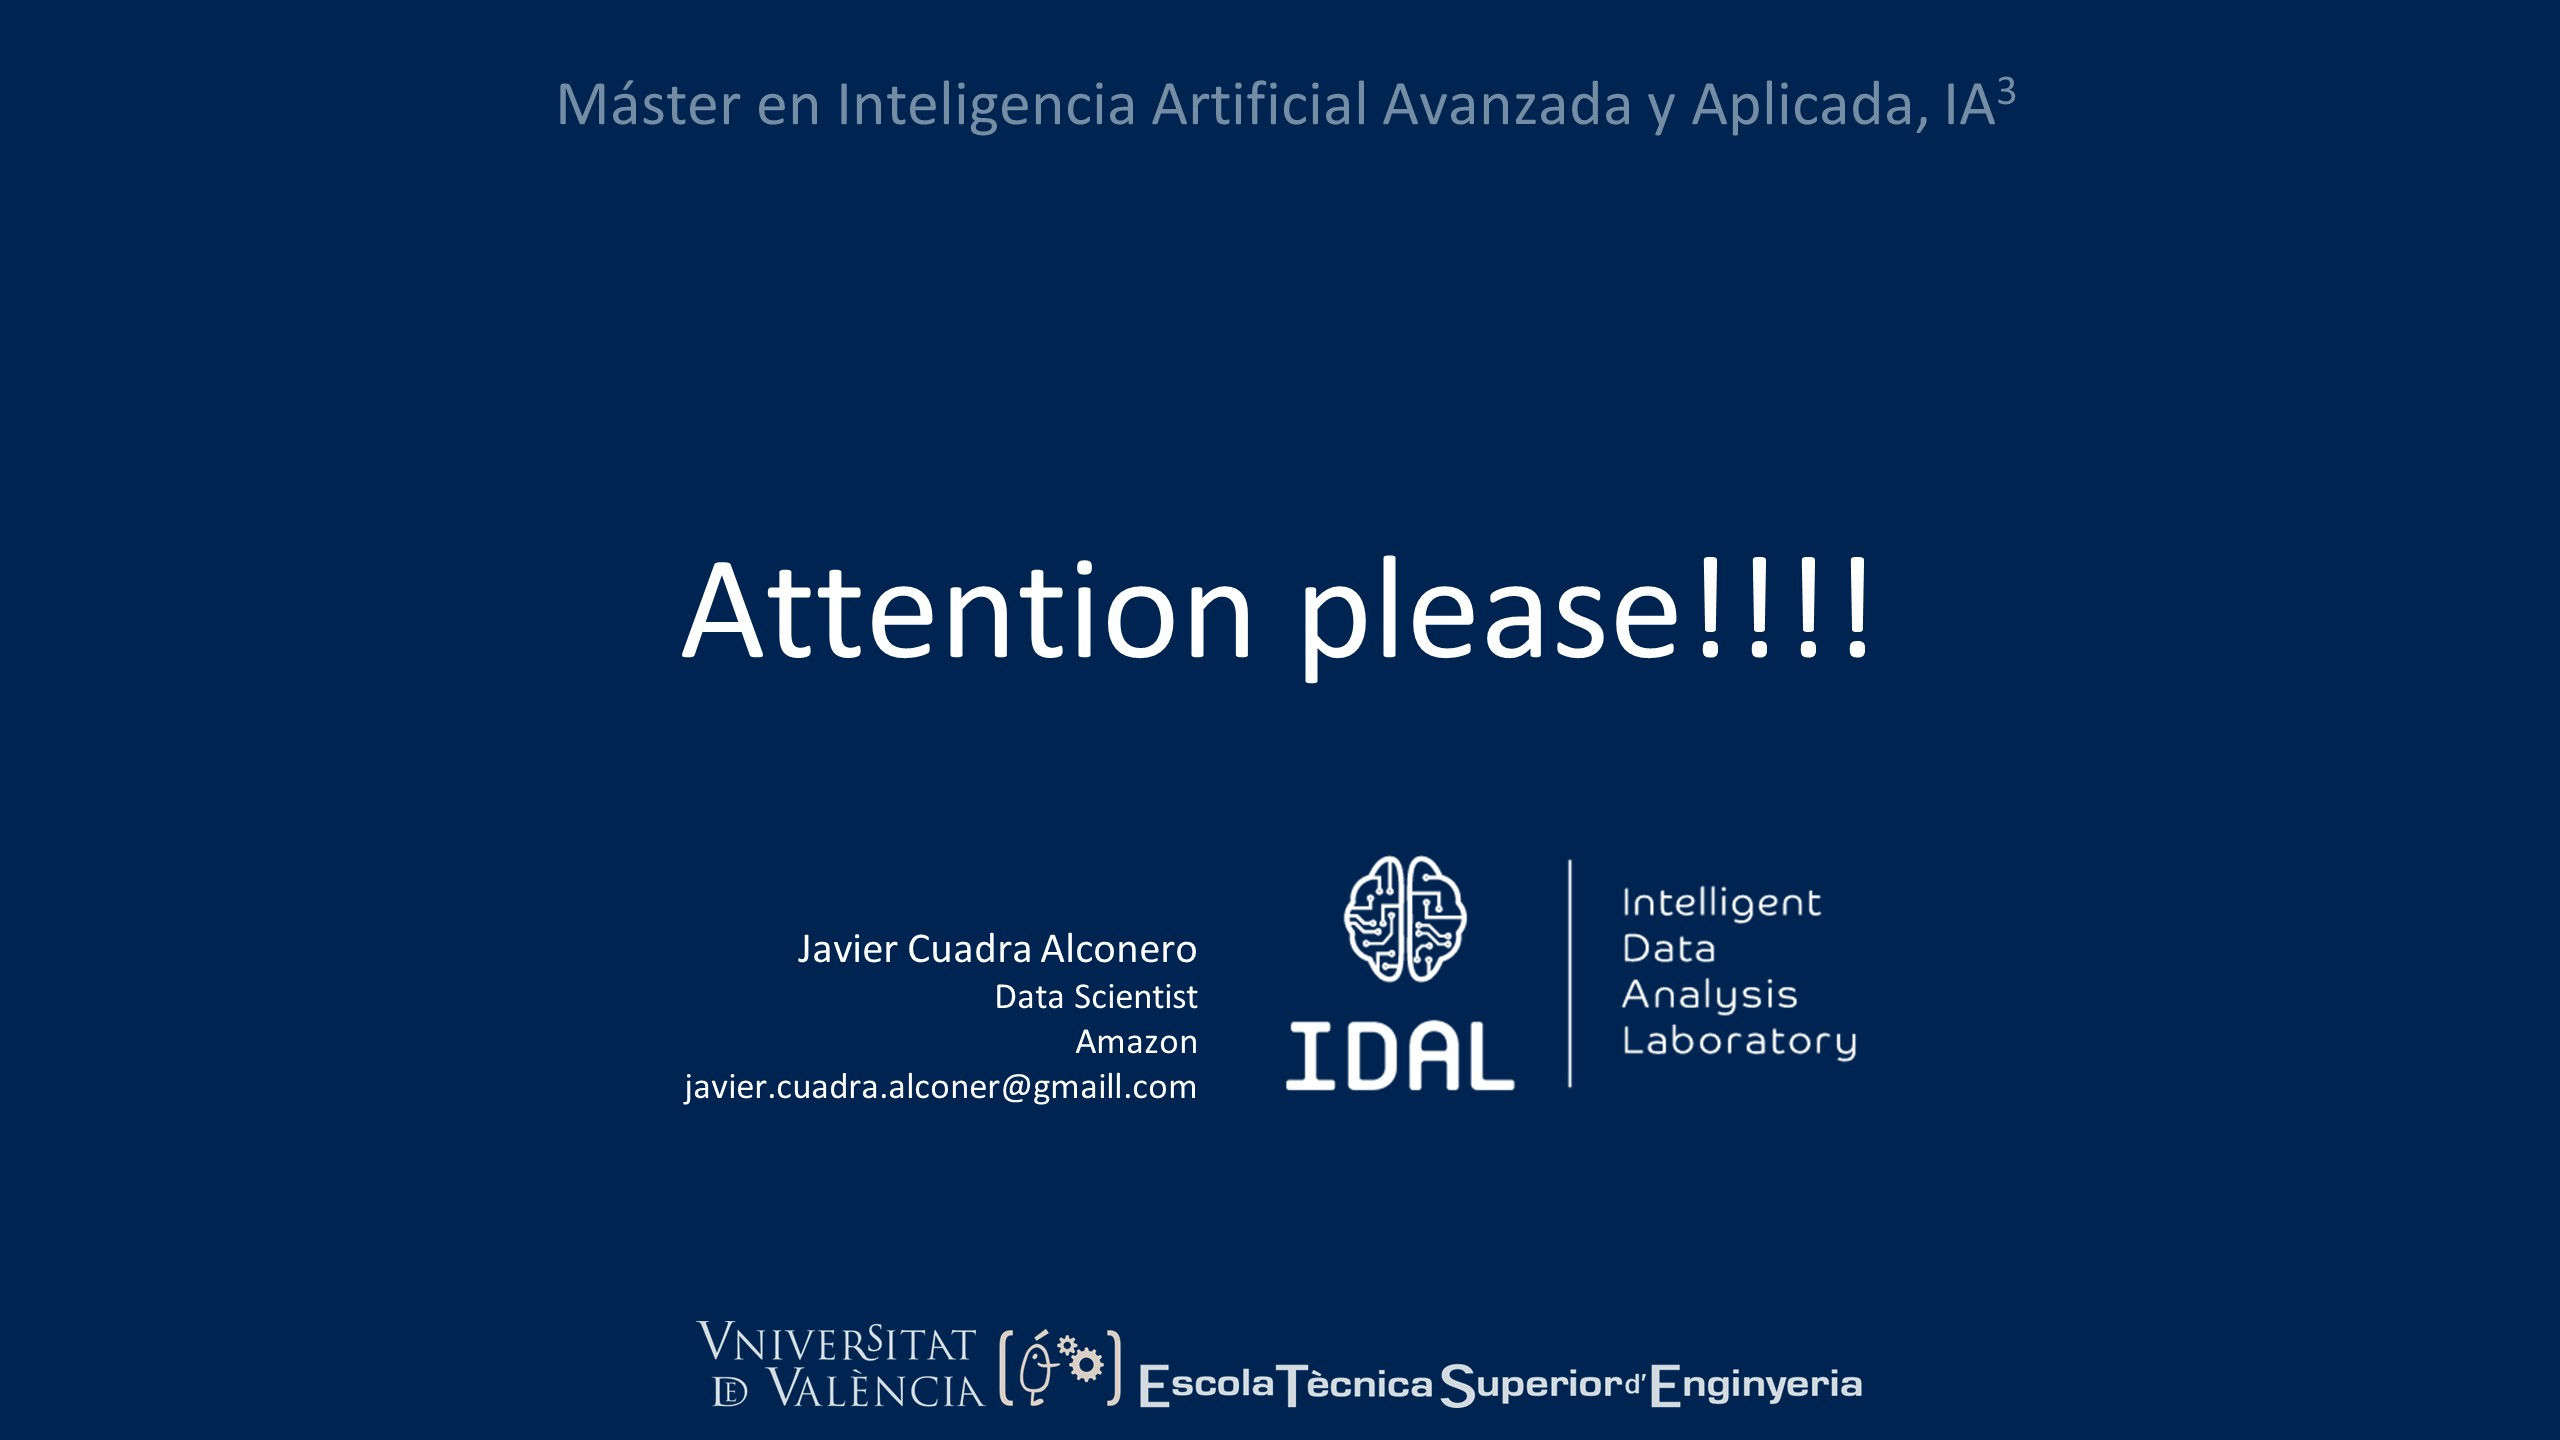

Antes de continuar, quiero deciros que si habéis llegado hasta aquí. Habéis conseguido entender las arquitecturas presentadas durante el curso y comprender el código estáis en el estado del arte. Mi más sincera enhorabuena.

El mecanismo de atención ha dado lugar a una nueva línea de investigación dentro del mundo del Deep Learning. Sus ideas se mueven más allá del nlp y afectan a algoritmos de computer vision.

¿Pero a qué se debe esto?

### ¿Recordáis cuál era el principal problema de los modelos secuenciales presentados hasta ahora?

Como comentamos en clases anteriores, los modelos LSTM y GRU sufren al tratar de codificar secuencias largas dado que necesitan representar toda la información de los diferentes puntos de la secuencia en una única salida.

El mecanismo de atención resuelve justamente este problema, permitiendo a los modelos centrar su "atención" en diferentes puntos de la secuencia a la hora de decodificarla, permitiendo extraer información de todos los estados intermedios de un modelo secuencial.

El mecanismo es simple y efectivo, aunque sufre de limitaciones de nuevo cuando se aplica a secuencias largas (si en una LSTM la información empieza a disiparse en torno a los 10-15 celdas, en los mecanismos de atención cadenas cercanas a los 30 estados pueden considerarse largas). Aún sin ser el mecanismo que permitirá a los científicos de datos codificar cualquier secuencia de información independientemente de su longitud, su aparición supuso una revolución en cuanto a los rendimientos alcanzados en tareas de NLP y la construcción de arquitecturas novedosas que suponen el estado del arte en este momento.

¿En qué se basa el mecanismo de atención?

El paper original de atención podéis encontrarlo aquí:

https://arxiv.org/pdf/1409.0473.pdf

Se propuso como solución a las limitaciones de la traducción máquina en aquel momento.

Revisemos las ecuaciones propuestas en el modelo.

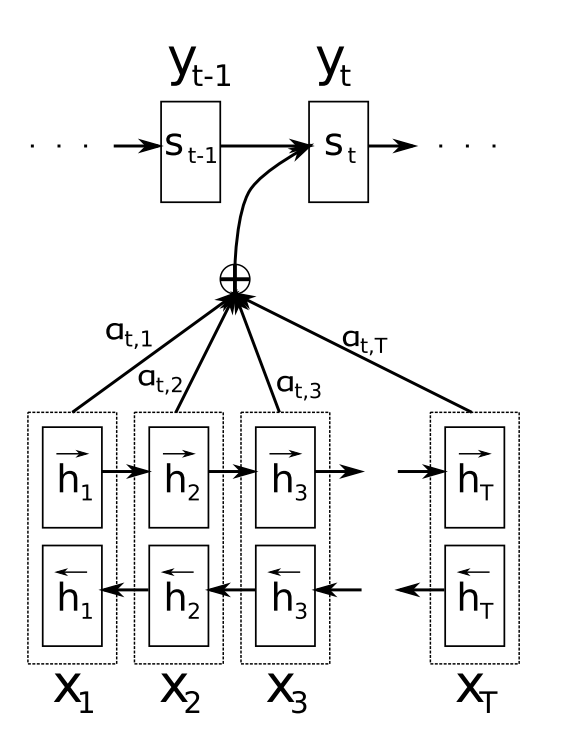



Si os fijáis en la nueva arquitectura aparecen nuevos términos $ \alpha $ y $s_t$. Estos términos pueden definirse por medio de las siguientes ecuaciones.

$ $

$p(y_t|y_1....y_{t-1}, x) = f(s_t, c_t, y_{i-1})$

$s_i = f(s_{i-1}, y_{i-1}, c_i)$

$c_i = \sum_{j=1}^T\alpha_{ij}*h_j$

$\alpha_{ij} = \dfrac{exp(e_{ij})}{\sum_{k=1}^Texp(e_{ik})}$

$e_{ij} = a(s_{i-1}, h_j)$

$ $

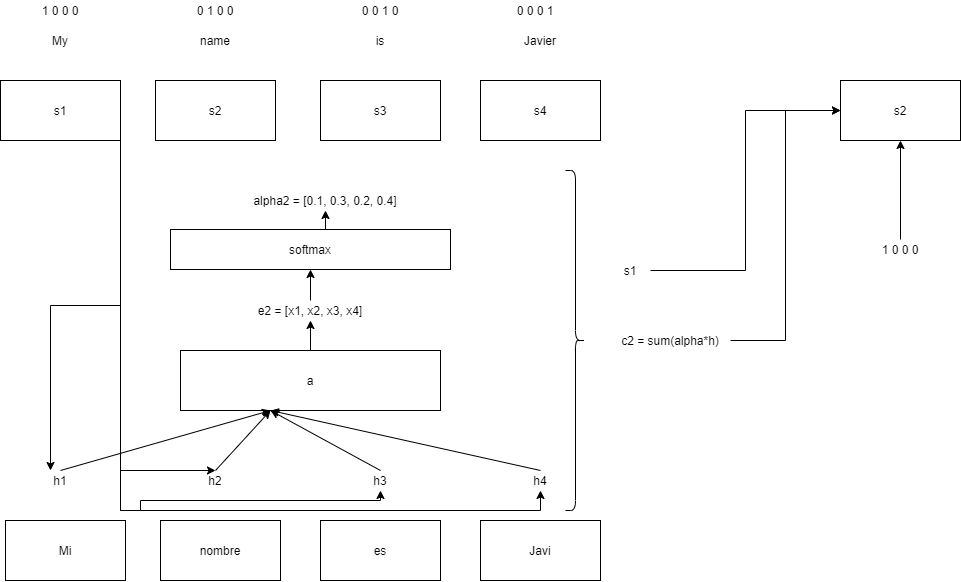

Como podéis ver el mecanismo de atención se basa en una combinación lineal de los estados extraídos del decoder para generar el vector c de contexto. Las ecuaciones anteriores son genéricas para cualquier modelo secuencial. En el caso de la lstm s_t sería nuestra nueva salida, el estado oculto de cada celda de la red (la h del modelo). Es importante diferenciarla de la h del encoder, pues esta es generada de manera tradicional sin tener en cuenta los estados ocultos anteriores.

Desgranando las ecuaciones tenemos:

$c_i$ = Una combinación lineal que nos permite generar un nuevo vector de contexto como entrada para la celda.

$\alpha_{ij}$ = Un clasificador softmax que por medio de la probabilidad dota de importancia a cada estado oculto del encoder

$e_{ij}$ = Los valores de energía de la atención, en este caso la a que aparece en la ecuación es una red neuronal feed-forward que se encarga de calcular los valores.

No os sintáis abrumados por la matemática bajo el modelo, aunque pueda parecer compleja, la intuición bajo ella es relativamente simple y habéis superado retos parecidos durante el curso. Estamos construyendo un modelo capaz de fijarse en que parámetros aportan más a cada estado en el tiempo a la hora de decodificar una secuencia.

Existen diversos tipos de atención y podéis encontrar las referencias originales aquí:

Content-Based Attention = https://arxiv.org/abs/1410.5401
Additive Attention = https://arxiv.org/pdf/1409.0473.pdf (La explicada)
Location-Base = https://arxiv.org/pdf/1508.04025.pdf
General = https://arxiv.org/pdf/1508.04025.pdf
Dot-Product = https://arxiv.org/pdf/1508.4025.pdf
Scaled Dot-Product = http://papers.nips.cc/paper/7181-attention-is-all-you-need.pdf (Muy importante arquitectura de transformer y self-attention)

# Self-Attention y Transformers

La evolución de la atención ha pasado por diversas fases. Es especialmente destacable el paper de Attention is all you need escrito por Vaswani et al en 2017. En este paper se propone un tipo de atención y arquitectura capaz de codificar y decodificar secuencias utilizando únicamente mecanismos de atención, eliminando los modelos secuenciales anteriores de la ecuación.

Veamos en que se basa el mecanismo de self-attention:

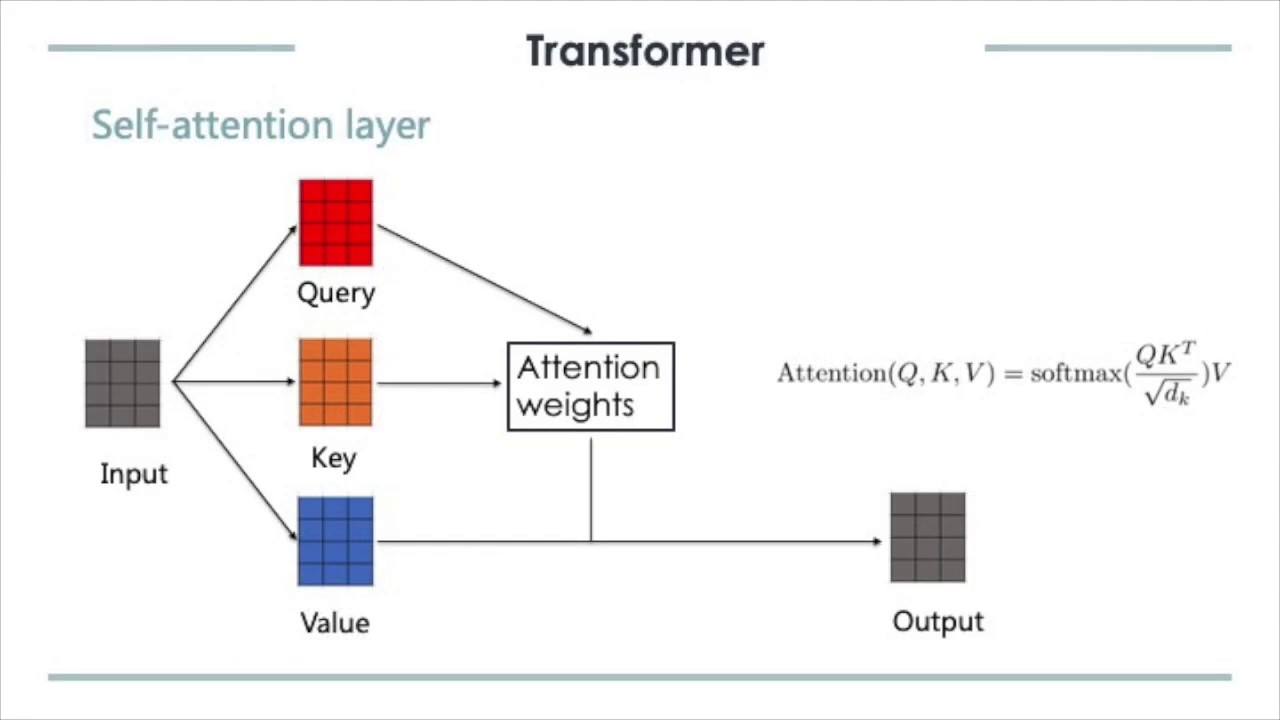
Imagen extraída del siguiente vídeo de youtube: https://www.youtube.com/watch?v=5T38-2J5CcY

Como podéis apreciar el mecanismo de self-attention se basa en 3 matrices de pesos, Q, K y V. Estas matrices de peso hacen referencia a los conceptos de query, key y value. 

- Las matriz de Query hace referencia a los vectores sobre los que quieres calcular la atención.
- La matriz de Key hace referencia a los vectores con respecto a los que quieres calcular la atención. En self-attention quieres calcular la atención para cada vector de la secuencia contra la misma secuencia.
- Value son los vectores de entrada de la secuencia.
- $d_k$ hace referencia a las dimensiones de los vectores de la matriz K. Actúa como factor de escalado.

Las ecuaciones que dominan los calculos de estas matrices serían:

$ Q = Input * W_Q (Capa Linear) $

$ K = Input * W_K (Capa Linear) $

$ V = Input * W_V (Capa Linear) $

$ e = \dfrac{Q*K^t}{d_k} (EnergíaAtención) $

$ \alpha = softmax(e) $

$ Output = dotproduct(alpha, V) $

Las capas de self-attention se basan únicamente en estos conceptos lo cual las hace especialmente sencillas de implementar.


# Ejercicio

Implementar una capa de self-attention en Keras y testearla con el método call de la capa. Realizad el análisis dimensional de las salidas y los valores intermedios calculados (podéis mostrarlos en pantalla con el método print o devolverlos como salida del método call). 

Para generar unos datos de testeos podéis generaros una secuencia de entrada utilizando np.random.normal.

In [ ]:
# Escribid aquí vuestra capa

Una vez comprendida la capa de self-attention podemos pasar a analizar la arquitectura del transformer:

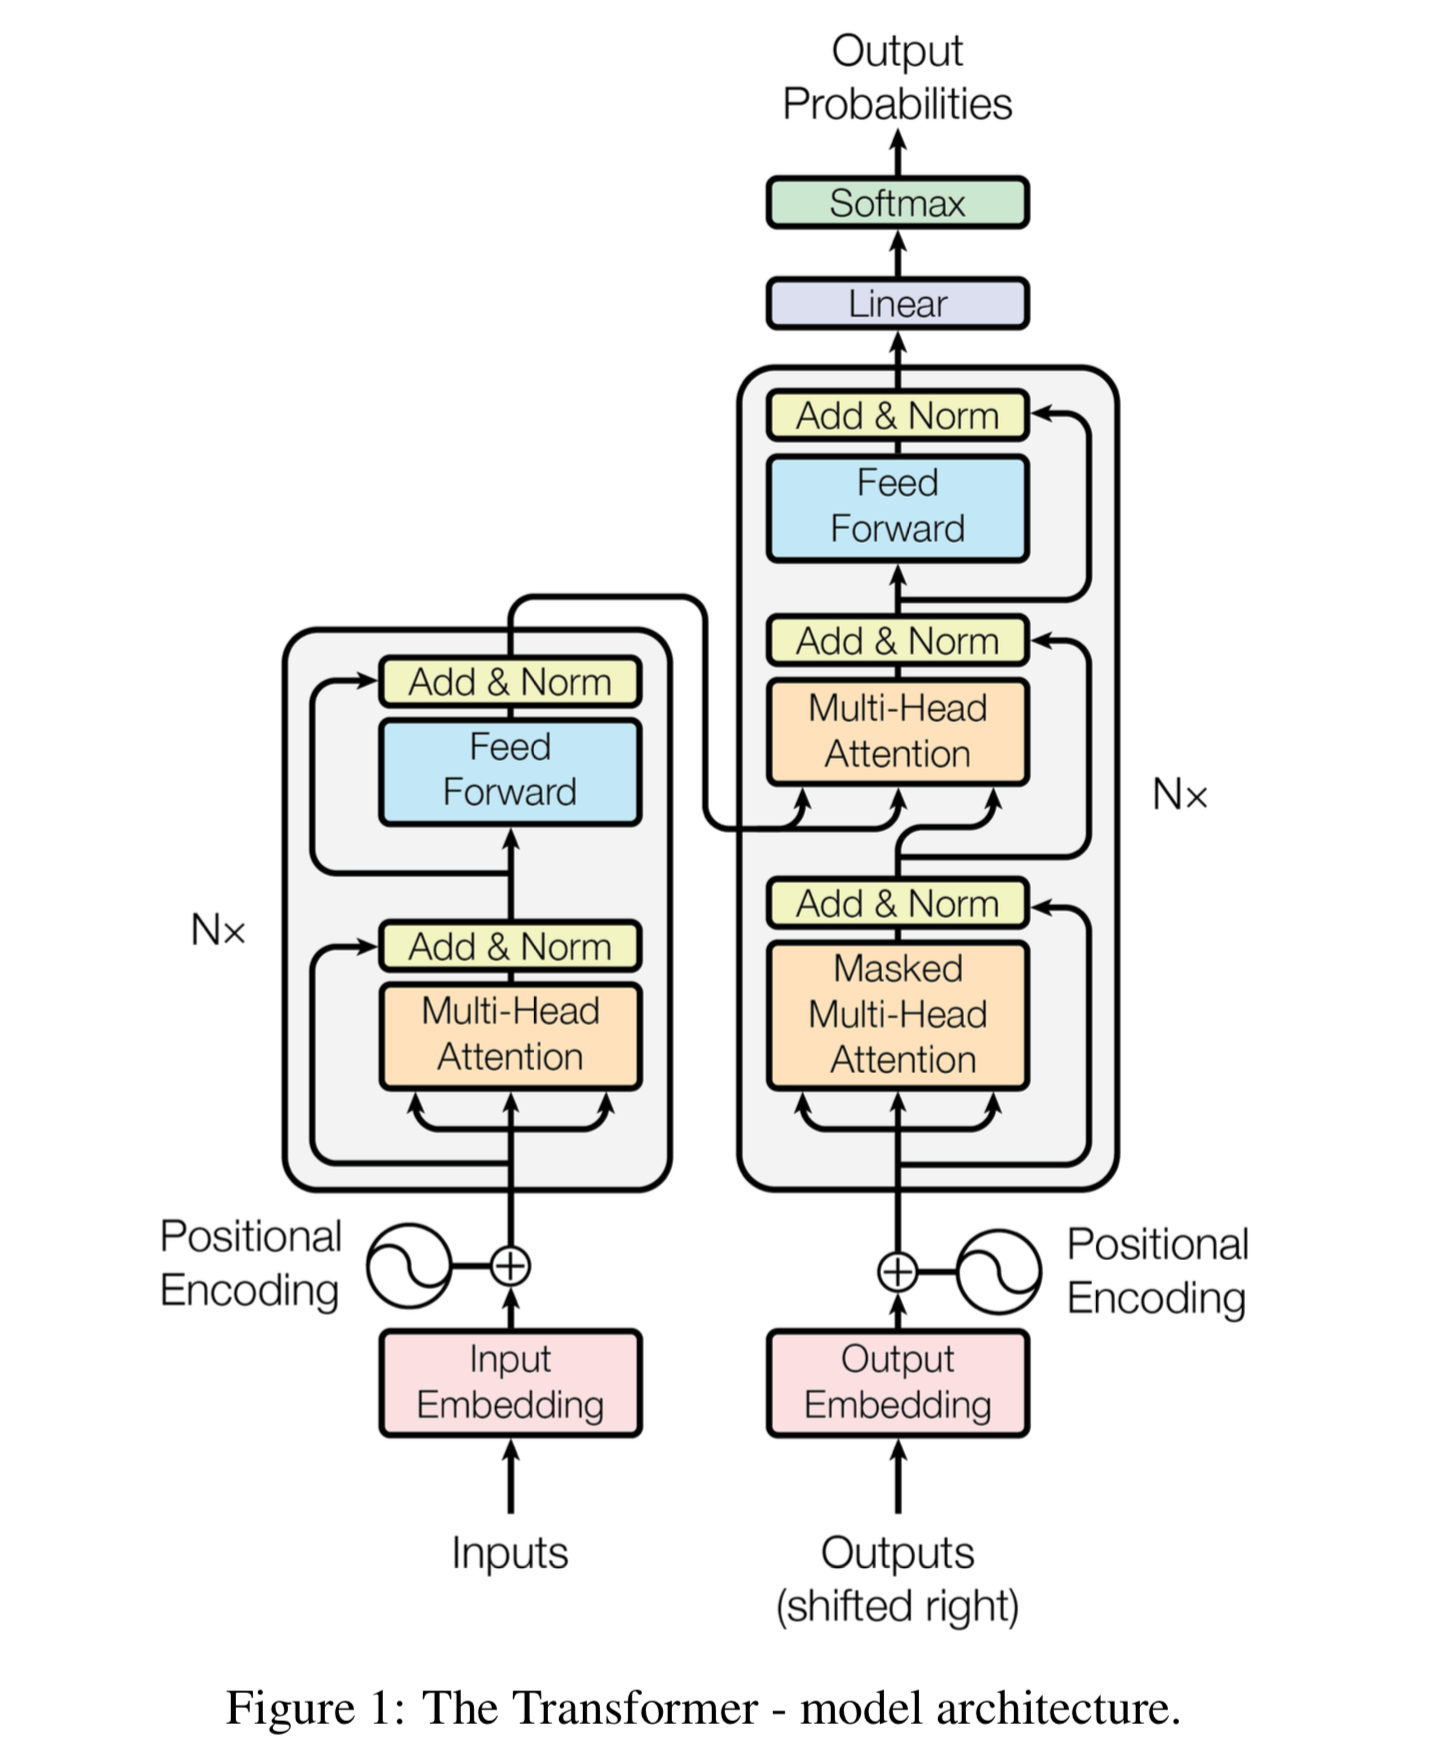

En esta arquitectura encontramos varias estructuras que podemos analizar por separado. 

# Encoder

## Multi-Head Attention

El módulo de multi-head attention no es más que un conjunto de capas de self-attention agrupadas en paralelo. Cada una de estas capas de self-attention realiza el cómputo de sus propios outputs por separado y finalmente vuelve a multiplicar por una capa lineal. La única ecuación que añadiríamos a la fórmula anterior sería:

$Outputs_{concat} = [Output_1|......|Output_n]$

$Output_{multihead} = Outputs_{concat}*W_{multihead}$

## Add & Norm

El módulo add and norm realiza dos operaciones. Primero suma los resultados de la capa anterior mediante una conexión residual y tras ello normaliza el tensor.
El método de normalización aplicado es relativamente diferente al batch normalization que habéis podido estudiar y podéis encontrar una descripción sencilla así como su paper en este post: https://paperswithcode.com/method/layer-normalization No le prestéis mucha atención pues en esencia las operaciones realizadas son las mismas que en el método de Batch Normalization, con la particularidad de que los parámetros $\mu$ y $\beta$ se calculan en relación a las salidas y la conexión residual y no introduce más dependencias en el entrenamiento de la red. Así de esta forma las ecuaciones de esta capa son las siguientes.

$ Add = X+Outputs $

$ LayerNorm(Add) $

Donde $X$ representa las entradas a la capa y $Outputs$ las salidas de la capa. Tened en cuenta que para poder realizar esta suma es necesario conservar las dimensiones de la entrada a lo largo del proceso.

## Feed Forward

Se trata de una red neuronal feed forward tradicional. La salida de esta capa pasa de nuevo por un proceso Add&Norm y es entonces trasladada al decoder, convirtiéndose en los parámetros Q y K de un módulo de Multi-Head Attention.

# Decoder

## Masked Multi Head Attention

Se trata de una capa de self-attention como la explicada. La particularidad de esta capa es que enmascara los valores de la secuencia posteriores al valor que se intenta decodificar, de manera que no se le permite al algoritmo extraer información del futuro. Supongamos que tenemos una secuencia de dos tokens y estamos trabajando en decodificar la primera posición. En la ecuación de los outputs, restaríamos -inf a cualquier valor posterior a la primera posición:

$ Outputs = dotproduct(\alpha, V) $

$ Outputs = \alpha_1*V_1 + (alpha_2*V_2 - inf) $

$ (alpha_2*V_2 - inf) = 0 $


## Multi Head Attention - Encoder-Decoder Attention

Volvemos a enfrentarnos a una capa similar a la self-attention. Sin embargo, en este punto del proceso se le ha llamado Encoder-Decoder Attention. Mientras los valores de V provienen de la secuencia que se ha comenzado a decodificar, Q y K provienen se son los valores codificados por el encoder.

$ Q = Output_{encoder} * W_Q (Capa Linear) $

$ K = Output_{encoder} * W_K (Capa Linear) $

$ V = Output_{decoder-masked-selfattention} * W_V (Capa Linear) $

## Linear y Softmax

Finalmente la salida del decoder se traslada a una capa linear y a un clasificador softmax para decodificar la secuencia.


# Encoder-Decoder Stacked

Es posible generar una arquitectura de transformers "apilados" colocando secuencialmente varios encoders y decoders como se muestra en la imagen. 

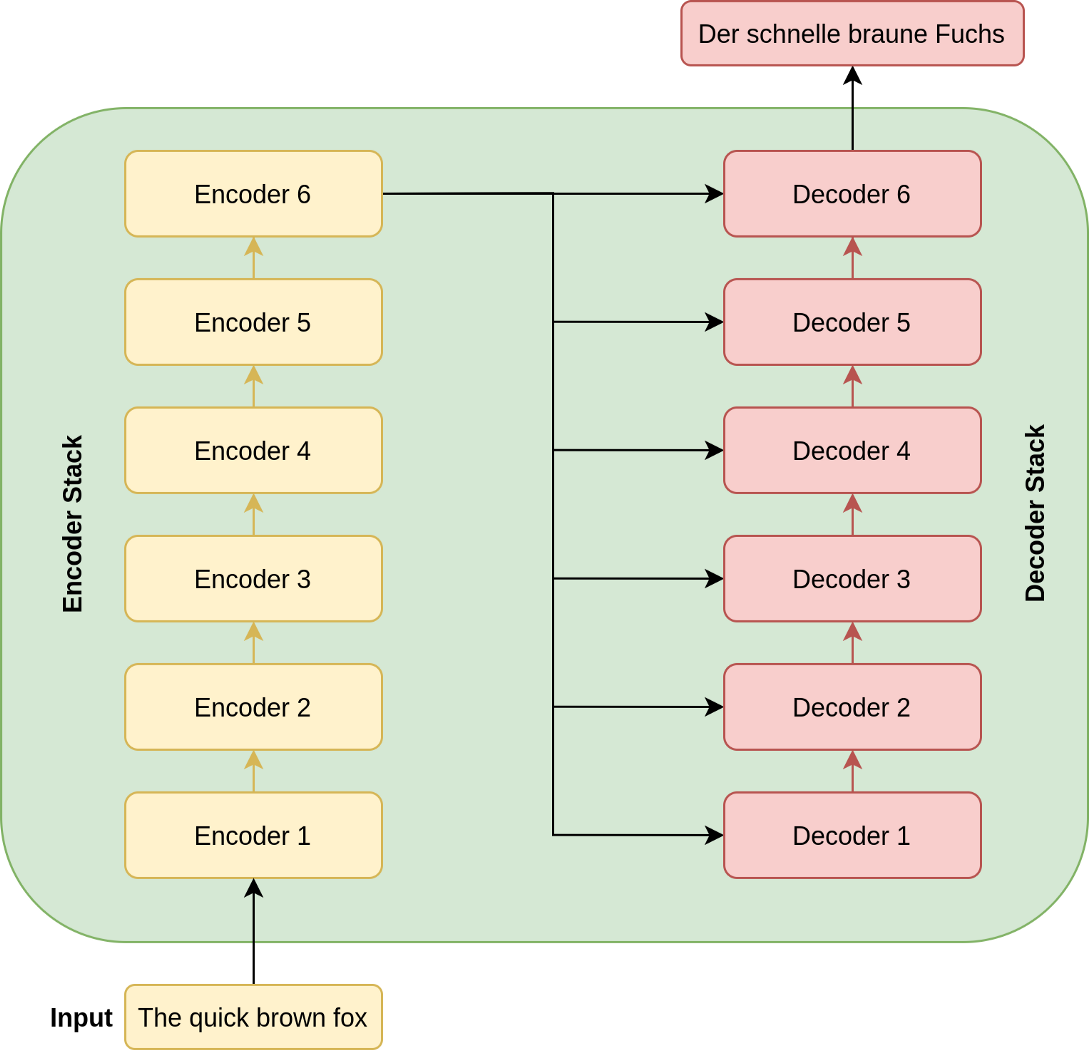

Imagen extraída de: https://hackernoon.com/essential-guide-to-transformer-models-in-machine-learning-dzz3tk8




Recurso extra: http://jalammar.github.io/illustrated-transformer/


# Ejercicio

Siguiendo la documentación de Keras planteemos un ejercicio de clasificación construyendo una arquitectura de encoder de transformers.

Para ello:

- Construid un embedding layer a la entrada del modelo
- Consultad la documentación para construir un transformer block.https://keras.io/examples/nlp/text_classification_with_transformer/
- Podéis consultar también la documentación para el multihead attention en
keras https://keras.io/api/layers/attention_layers/multi_head_attention/
- Añadid una capa densa a la salida y un clasificador softmax

Documentación para cargar el dataset:

https://keras.io/api/datasets/imdb/#load_data-function


In [ ]:
from tensorflow import keras
vocab_size = 15000 # Podéis alterar este parámetro para considerar un vocabulario
# De diferente tamaño
maxlen = 200 # Definir el máximo tamaño de la secuencia en el dataset
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(maxlen=200,
                                                                   num_words=vocab_size)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 